In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
df = pd.read_csv('kaggle_phishing_email/Enron.csv')

Data Analysis

In [33]:
print("1. Dataset Shape:", df.shape)

print(df.dtypes)


1. Dataset Shape: (29767, 3)
subject    object
body       object
label       int64
dtype: object


In [34]:
print("\n2. First few rows:")
print(df.head())


2. First few rows:
                                      subject  \
0                   hpl nom for may 25 , 2001   
1            re : nom / actual vols for 24 th   
2  enron actuals for march 30 - april 1 , 201   
3                   hpl nom for may 30 , 2001   
4                   hpl nom for june 1 , 2001   

                                                body  label  
0  ( see attached file : hplno 525 . xls )\r\n- h...      0  
1  - - - - - - - - - - - - - - - - - - - - - - fo...      0  
2  estimated actuals\r\nmarch 30 , 2001\r\nno flo...      0  
3  ( see attached file : hplno 530 . xls )\r\n- h...      0  
4  ( see attached file : hplno 601 . xls )\r\n- h...      0  


In [36]:
print("\n3. Dataset Info:")
print(df.info())


3. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29767 entries, 0 to 29766
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  29569 non-null  object
 1   body     29767 non-null  object
 2   label    29767 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 697.8+ KB
None


In [38]:
print("\n4. Basic Statistics:")
df.describe()



4. Basic Statistics:


label
count  29767.000000
mean       0.469513
std        0.499078
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [39]:
print("\n5. Missing Values:")
df.isnull().sum()



5. Missing Values:


subject    198
body         0
label        0
dtype: int64

In [40]:
df.columns


Index(['subject', 'body', 'label'], dtype='object')

In [41]:
df.iloc[0,1]

'( see attached file : hplno 525 . xls )\r\n- hplno 525 . xls'

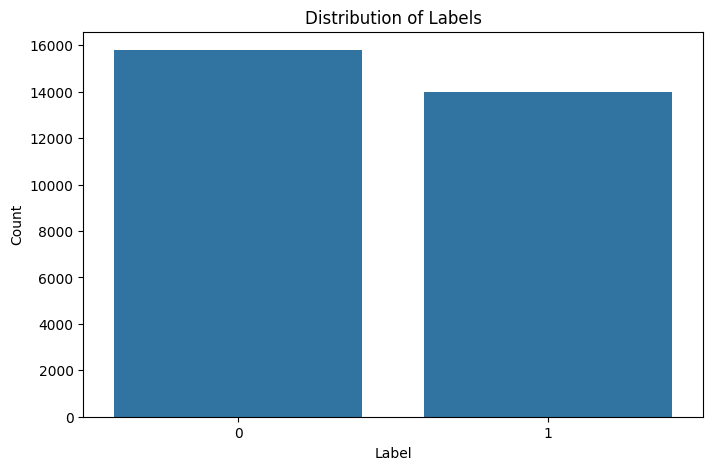

In [46]:
plt.figure(figsize=(8, 5))
label_dist = df['label'].value_counts()
sns.barplot(x=label_dist.index, y=label_dist.values)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [47]:
print("\n7. Label Distribution Percentages:")
print(df['label'].value_counts(normalize=True) * 100)


7. Label Distribution Percentages:
label
0    53.048678
1    46.951322
Name: proportion, dtype: float64


In [48]:
print("\n8. Sample Email from Class 0 (Non-phishing):")
print(df[df['label'] == 0][['subject', 'body']].iloc[0])
print("\nSample Email from Class 1 (Phishing):")
print(df[df['label'] == 1][['subject', 'body']].iloc[0])


8. Sample Email from Class 0 (Non-phishing):
subject                            hpl nom for may 25 , 2001
body       ( see attached file : hplno 525 . xls )\r\n- h...
Name: 0, dtype: object

Sample Email from Class 1 (Phishing):
subject    d - link dwl - g 510 802 . 11 g wireless pci l...
body       $ 39 . 85 dwl - g 510\r\nhigh speed\r\n2 . 4\r...
Name: 3501, dtype: object


Text Length Analysis

In [50]:
# 1. Calculate various length metrics
df['subject_length'] = df['subject'].str.len()
df['body_length'] = df['body'].str.len()
df['subject_word_count'] = df['subject'].str.split().str.len()
df['body_word_count'] = df['body'].str.split().str.len()

In [51]:
# 2. Basic statistics of text lengths
print("Text Length Statistics:")
length_stats = df[['subject_length', 'body_length', 
                   'subject_word_count', 'body_word_count']].describe()
print(length_stats)

Text Length Statistics:
       subject_length    body_length  subject_word_count  body_word_count
count    29569.000000   29767.000000        29569.000000     29767.000000
mean        34.301532    1487.822421            7.147452       303.219068
std         47.831388    4202.647954           11.198096       829.776123
min          1.000000       1.000000            1.000000         1.000000
25%         19.000000     332.000000            4.000000        67.000000
50%         30.000000     706.000000            6.000000       150.000000
75%         44.000000    1565.000000            9.000000       328.000000
max       7170.000000  230120.000000         1665.000000     45448.000000


In [52]:
# 3. Length statistics by class
print("\nText Length Statistics by Class:")
print(df.groupby('label')[['subject_length', 'body_length', 
                          'subject_word_count', 'body_word_count']].describe())



Text Length Statistics by Class:
      subject_length                                                       \
               count       mean        std  min   25%   50%   75%     max   
label                                                                       
0            15791.0  30.695269  21.472845  1.0  18.0  27.0  41.0   815.0   
1            13778.0  38.434678  65.952173  1.0  22.0  34.0  48.0  7170.0   

      body_length               ... subject_word_count          \
            count         mean  ...                75%     max   
label                           ...                              
0         15791.0  1627.513457  ...                8.0   162.0   
1         13976.0  1329.990341  ...               10.0  1665.0   

      body_word_count                                                    \
                count        mean          std  min   25%    50%    75%   
label                                                                     
0             15791.0  3

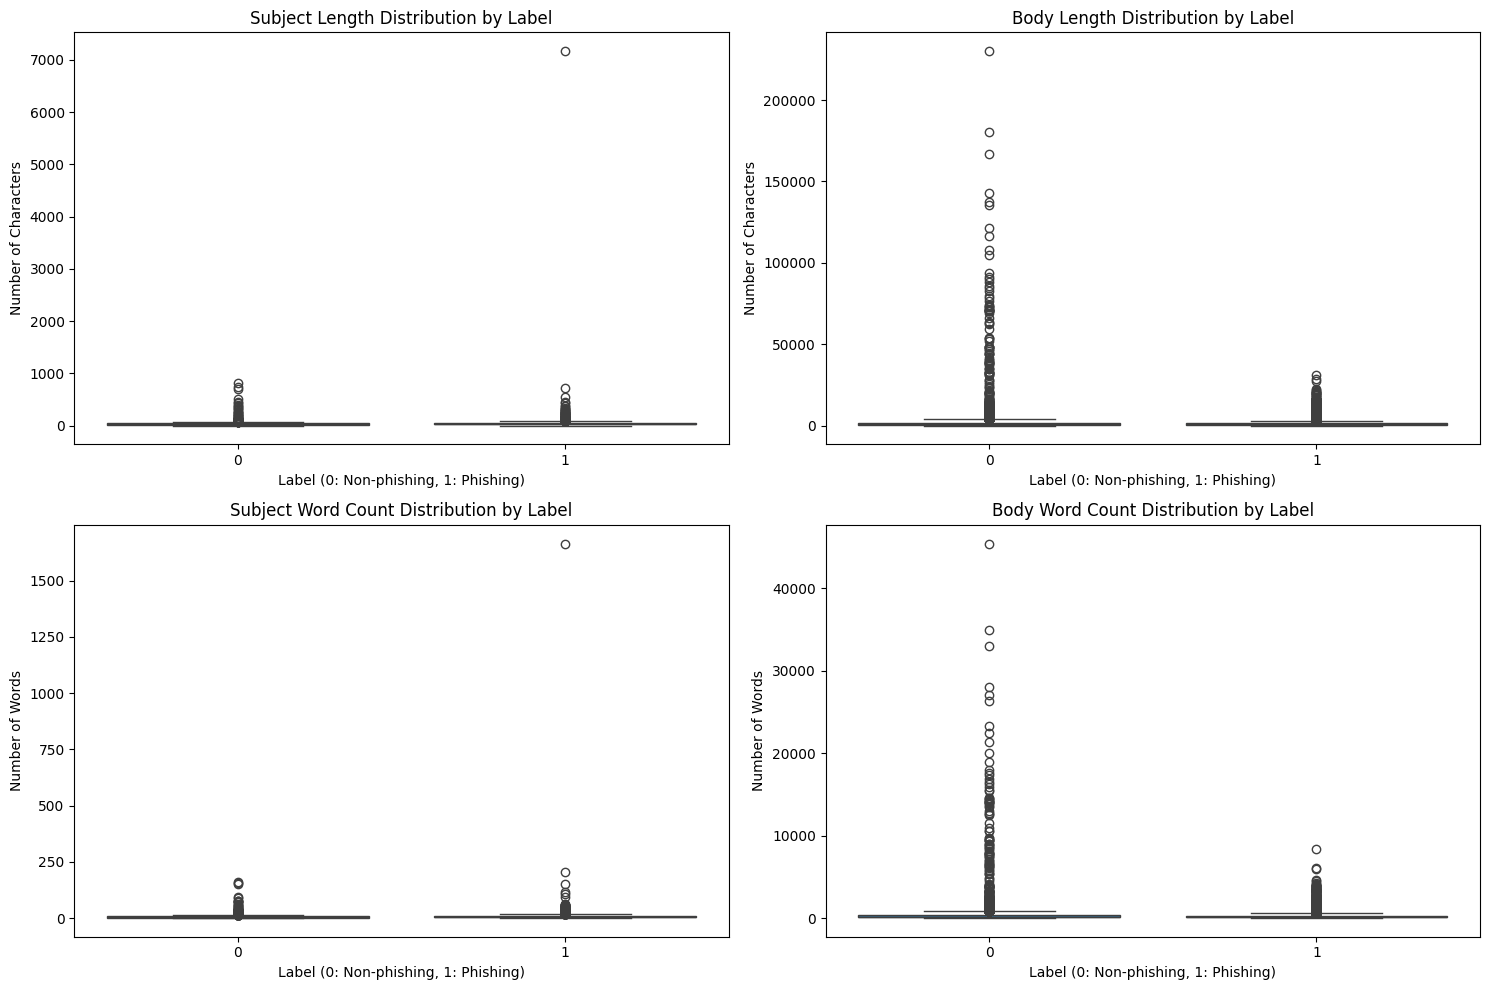

In [53]:
# 4. Visualizations

# 4.1 Distribution of lengths
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Subject length distribution
sns.boxplot(x='label', y='subject_length', data=df, ax=ax1)
ax1.set_title('Subject Length Distribution by Label')
ax1.set_xlabel('Label (0: Non-phishing, 1: Phishing)')
ax1.set_ylabel('Number of Characters')

# Body length distribution
sns.boxplot(x='label', y='body_length', data=df, ax=ax2)
ax2.set_title('Body Length Distribution by Label')
ax2.set_xlabel('Label (0: Non-phishing, 1: Phishing)')
ax2.set_ylabel('Number of Characters')

# Subject word count distribution
sns.boxplot(x='label', y='subject_word_count', data=df, ax=ax3)
ax3.set_title('Subject Word Count Distribution by Label')
ax3.set_xlabel('Label (0: Non-phishing, 1: Phishing)')
ax3.set_ylabel('Number of Words')

# Body word count distribution
sns.boxplot(x='label', y='body_word_count', data=df, ax=ax4)
ax4.set_title('Body Word Count Distribution by Label')
ax4.set_xlabel('Label (0: Non-phishing, 1: Phishing)')
ax4.set_ylabel('Number of Words')

plt.tight_layout()
plt.show()

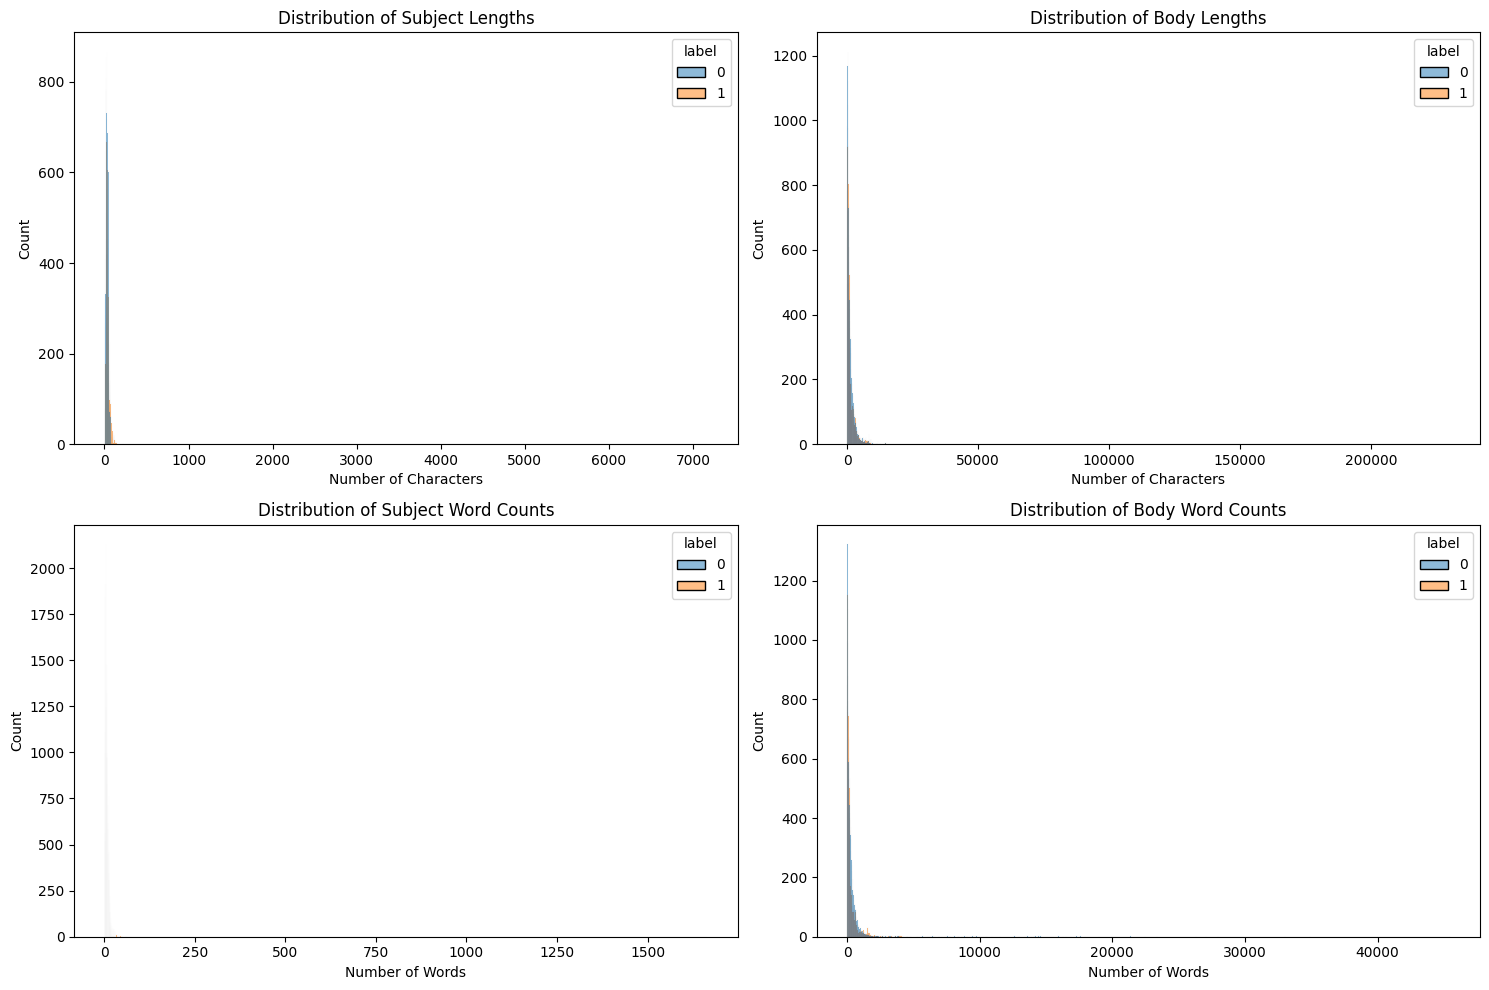

In [54]:
# 4.2 Histograms of lengths
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Subject length histogram
sns.histplot(data=df, x='subject_length', hue='label', multiple="layer", ax=ax1)
ax1.set_title('Distribution of Subject Lengths')
ax1.set_xlabel('Number of Characters')

# Body length histogram
sns.histplot(data=df, x='body_length', hue='label', multiple="layer", ax=ax2)
ax2.set_title('Distribution of Body Lengths')
ax2.set_xlabel('Number of Characters')

# Subject word count histogram
sns.histplot(data=df, x='subject_word_count', hue='label', multiple="layer", ax=ax3)
ax3.set_title('Distribution of Subject Word Counts')
ax3.set_xlabel('Number of Words')

# Body word count histogram
sns.histplot(data=df, x='body_word_count', hue='label', multiple="layer", ax=ax4)
ax4.set_title('Distribution of Body Word Counts')
ax4.set_xlabel('Number of Words')

plt.tight_layout()
plt.show()


In [55]:
# 5. Calculate summary statistics for extreme cases
print("\nTop 5 Longest Subjects:")
print(df.nlargest(5, 'subject_length')[['subject', 'subject_length', 'label']])

print("\nTop 5 Longest Bodies:")
print(df.nlargest(5, 'body_length')[['body', 'body_length', 'label']])



Top 5 Longest Subjects:
                                                 subject  subject_length  \
18956   34 gjq 3 2 o 7 t 4 nx 9 uqzyhq 2 9 r 2 dfwwcp...          7170.0   
13958  thanks for taking time this morning to go over...           815.0   
12810  hey guys , i would like to get with you to dis...           741.0   
22978  fw : 2 minutes to read what i have to say . . ...           727.0   
14283  cash hayslett , rod ; gunther , dave ; selzer ...           692.0   

       label  
18956      1  
13958      0  
12810      0  
22978      1  
14283      0  

Top 5 Longest Bodies:
                                                    body  body_length  label
11351  enron : a wake - up call\r\nthe wall street jo...       230120      0
11385  rival to buy enron , top energy trader , after...       180073      0
11352  fall of a power giant : bailout is unlikely if...       166813      0
11363  accounting peer review gets more scrutiny\r\nt...       142681      0
11358  enron and dyn

In [56]:
# 6. Calculate length-based features
df['subject_body_ratio'] = df['subject_length'] / df['body_length']
print("\nSubject-to-Body Length Ratio Statistics:")
print(df.groupby('label')['subject_body_ratio'].describe())


Subject-to-Body Length Ratio Statistics:
         count      mean       std       min       25%       50%       75%  \
label                                                                        
0      15791.0  0.125013  2.162438  0.000061  0.014649  0.031774  0.084094   
1      13778.0  0.109430  0.592972  0.000340  0.019608  0.049541  0.106464   

         max  
label         
0      247.0  
1       59.0  


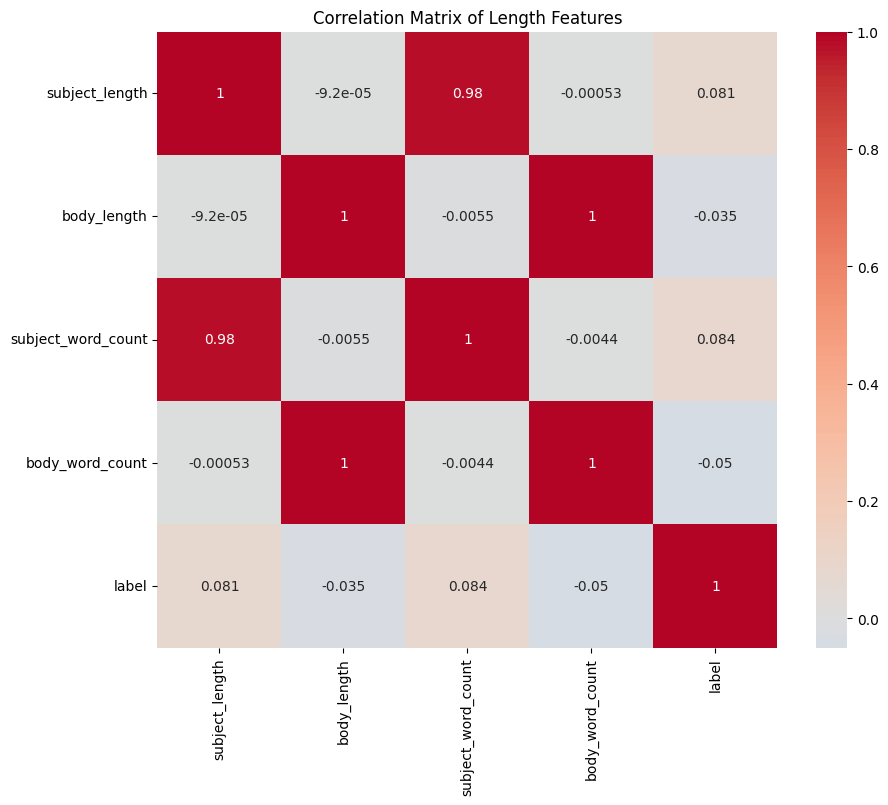

In [57]:
# 7. Correlation between lengths
correlation_matrix = df[['subject_length', 'body_length', 
                        'subject_word_count', 'body_word_count', 'label']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Length Features')
plt.show()

Text Characterisitics Analysis: Data cleaning and Feature extraction

In [58]:
import re
from collections import Counter


1. Dataset Shape: (29767, 10)

2. Missing Values:
subject                 0
body                    0
label                   0
subject_length        198
body_length             0
subject_word_count    198
body_word_count         0
subject_body_ratio    198
subject_cleaned         0
body_cleaned            0
dtype: int64

3. Data Types:
subject                object
body                   object
label                   int64
subject_length        float64
body_length             int64
subject_word_count    float64
body_word_count         int64
subject_body_ratio    float64
subject_cleaned        object
body_cleaned           object
dtype: object

4. Empty Strings:
Empty subjects: 198
Empty bodies: 0

5. Basic Statistics:
       subject_length    body_length  subject_word_count  body_word_count
count     29767.00000   29767.000000        29767.000000     29767.000000
mean         34.07337    1487.822354            7.099909       303.219035
std          47.75351    4202.647920           1

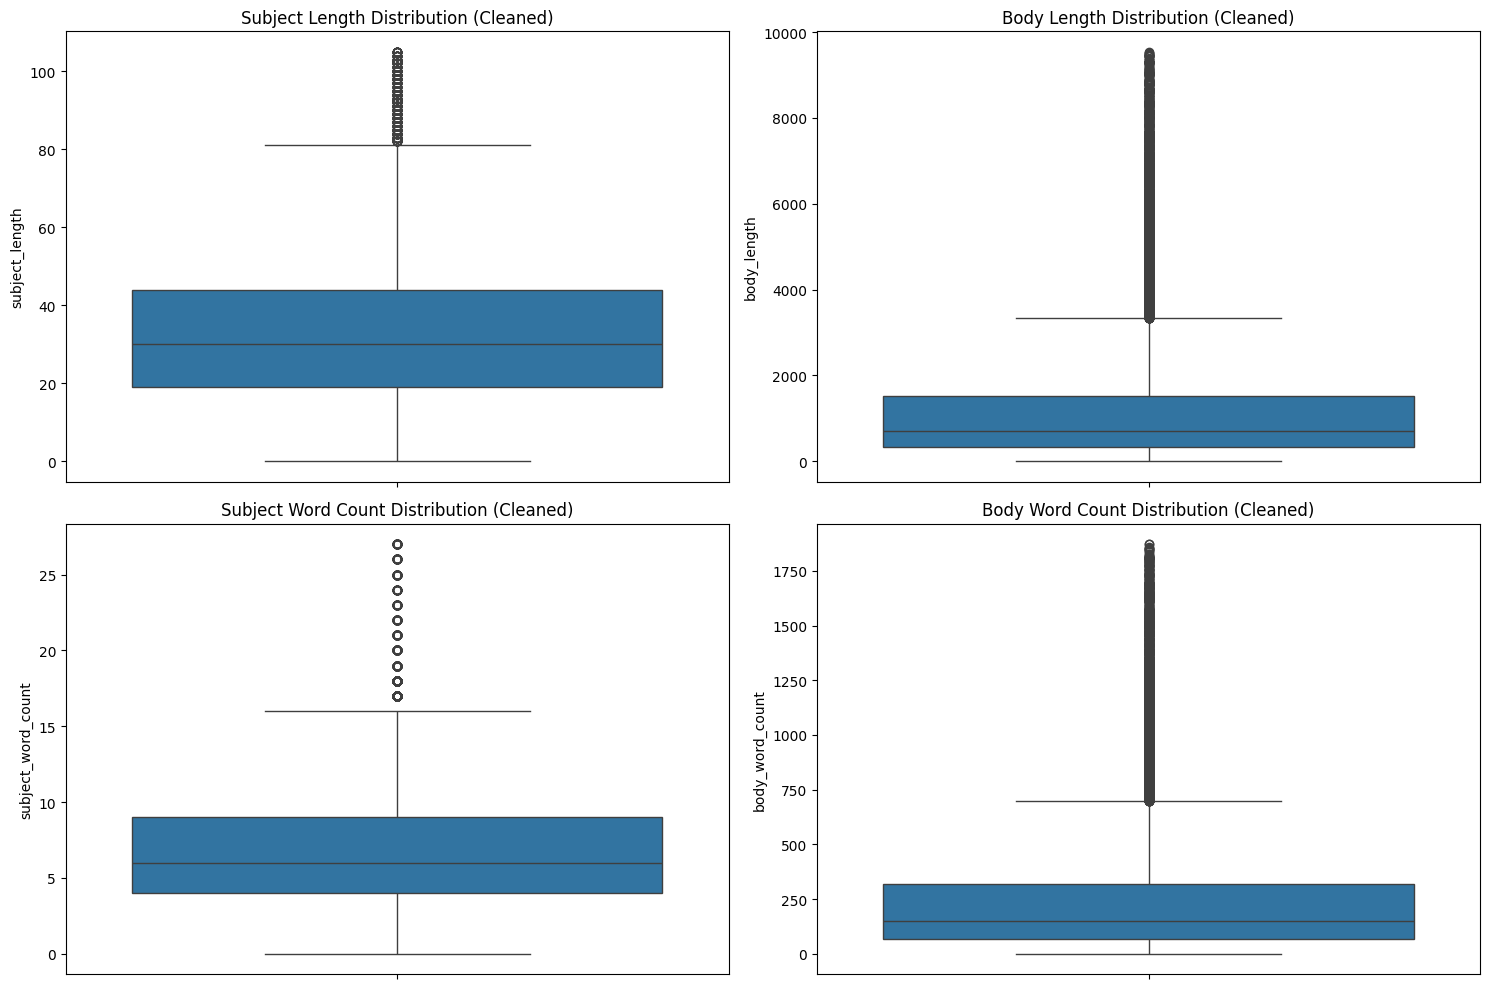


Extracting features from cleaned text...

Feature extraction completed successfully!


In [61]:

# Data cleaning function
def clean_text_data(df):
    """Clean and preprocess the text data"""
    
    # 1. Handle missing values
    df['subject'] = df['subject'].fillna('')  # Fill NaN with empty string
    
    # 2. Convert to string type
    df['subject'] = df['subject'].astype(str)
    df['body'] = df['body'].astype(str)
    
    # 3. Remove special characters that might cause issues
    df['subject'] = df['subject'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
    df['body'] = df['body'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
    
    # 4. Basic text cleaning
    def clean_text(text):
        # Convert to lowercase
        text = text.lower()
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text
    
    df['subject_cleaned'] = df['subject'].apply(clean_text)
    df['body_cleaned'] = df['body'].apply(clean_text)
    
    return df

# Now let's analyze the data quality
def analyze_data_quality(df):
    """Analyze the quality of the dataset"""
    print("1. Dataset Shape:", df.shape)
    
    print("\n2. Missing Values:")
    print(df.isnull().sum())
    
    print("\n3. Data Types:")
    print(df.dtypes)
    
    print("\n4. Empty Strings:")
    print("Empty subjects:", (df['subject'] == '').sum())
    print("Empty bodies:", (df['body'] == '').sum())
    
    print("\n5. Basic Statistics:")
    text_stats = pd.DataFrame({
        'subject_length': df['subject'].str.len(),
        'body_length': df['body'].str.len(),
        'subject_word_count': df['subject'].str.split().str.len(),
        'body_word_count': df['body'].str.split().str.len()
    })
    print(text_stats.describe())
    
    return text_stats


try:
    # Clean the data
    df_cleaned = clean_text_data(df)
    
    # Analyze data quality
    text_stats = analyze_data_quality(df_cleaned)
    
    # Visualize the cleaned data distributions
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Remove extreme outliers for better visualization (e.g., beyond 99th percentile)
    def plot_distribution(data, title, ax):
        percentile_99 = np.percentile(data, 99)
        filtered_data = data[data <= percentile_99]
        sns.boxplot(data=filtered_data, ax=ax)
        ax.set_title(title)
    
    plot_distribution(text_stats['subject_length'], 'Subject Length Distribution (Cleaned)', ax1)
    plot_distribution(text_stats['body_length'], 'Body Length Distribution (Cleaned)', ax2)
    plot_distribution(text_stats['subject_word_count'], 'Subject Word Count Distribution (Cleaned)', ax3)
    plot_distribution(text_stats['body_word_count'], 'Body Word Count Distribution (Cleaned)', ax4)
    
    plt.tight_layout()
    plt.show()
    
    # Now we can safely extract text features
    def extract_text_features(text):
        """Extract various characteristics from text"""
        # Make sure text is string
        text = str(text)
        
        features = {
            # Special characters and symbols
            'special_chars': len(re.findall(r'[^a-zA-Z0-9\s]', text)),
            'numbers': len(re.findall(r'\d', text)),
            'uppercase_words': len(re.findall(r'\b[A-Z]{2,}\b', text)),
            
            # Contact and link information
            'urls': len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)),
            'email_addresses': len(re.findall(r'[\w\.-]+@[\w\.-]+', text)),
            
            # Punctuation marks
            'exclamation_marks': text.count('!'),
            'question_marks': text.count('?'),
            
            # Text structure
            'spaces': text.count(' '),
            
            # Common spam indicators
            'dollar_signs': text.count('$'),
            'percentage_signs': text.count('%')
        }
        return features

    # Extract features from cleaned text
    print("\nExtracting features from cleaned text...")
    subject_features = pd.DataFrame([extract_text_features(text) for text in df_cleaned['subject_cleaned']])
    body_features = pd.DataFrame([extract_text_features(text) for text in df_cleaned['body_cleaned']])
    
    print("\nFeature extraction completed successfully!")
    
except Exception as e:
    print(f"An error occurred: {str(e)}")

Feature Statistics:
       subject_special_chars  subject_numbers  subject_uppercase_words  \
count           29767.000000     29767.000000                  29767.0   
mean                1.579568         1.157759                      0.0   
std                 2.732634         6.664922                      0.0   
min                 0.000000         0.000000                      0.0   
25%                 0.000000         0.000000                      0.0   
50%                 1.000000         0.000000                      0.0   
75%                 2.000000         0.000000                      0.0   
max               194.000000      1067.000000                      0.0   

       subject_urls  subject_email_addresses  subject_exclamation_marks  \
count       29767.0                  29767.0               29767.000000   
mean            0.0                      0.0                   0.093728   
std             0.0                      0.0                   0.539338   
min          

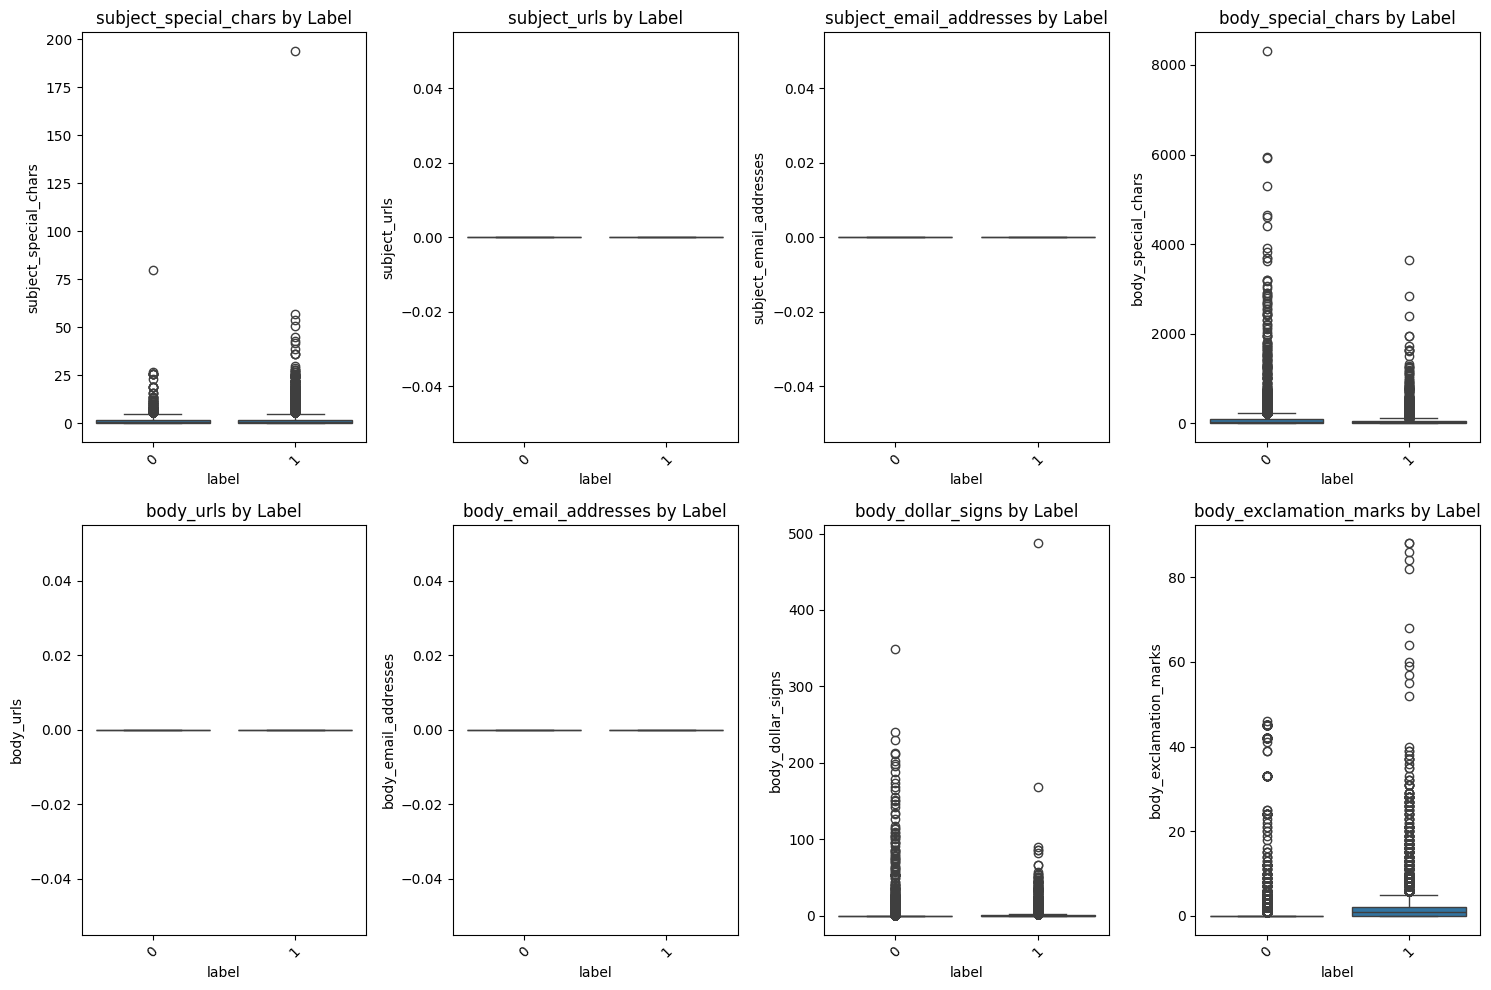


Top 10 Features Correlated with Label:
label                        1.000000
body_exclamation_marks       0.142697
subject_exclamation_marks    0.140169
subject_question_marks       0.126032
subject_percentage_signs     0.116247
subject_dollar_signs         0.092307
subject_special_chars        0.086660
subject_spaces               0.080195
body_percentage_signs        0.053481
body_dollar_signs            0.020583
Name: label, dtype: float64


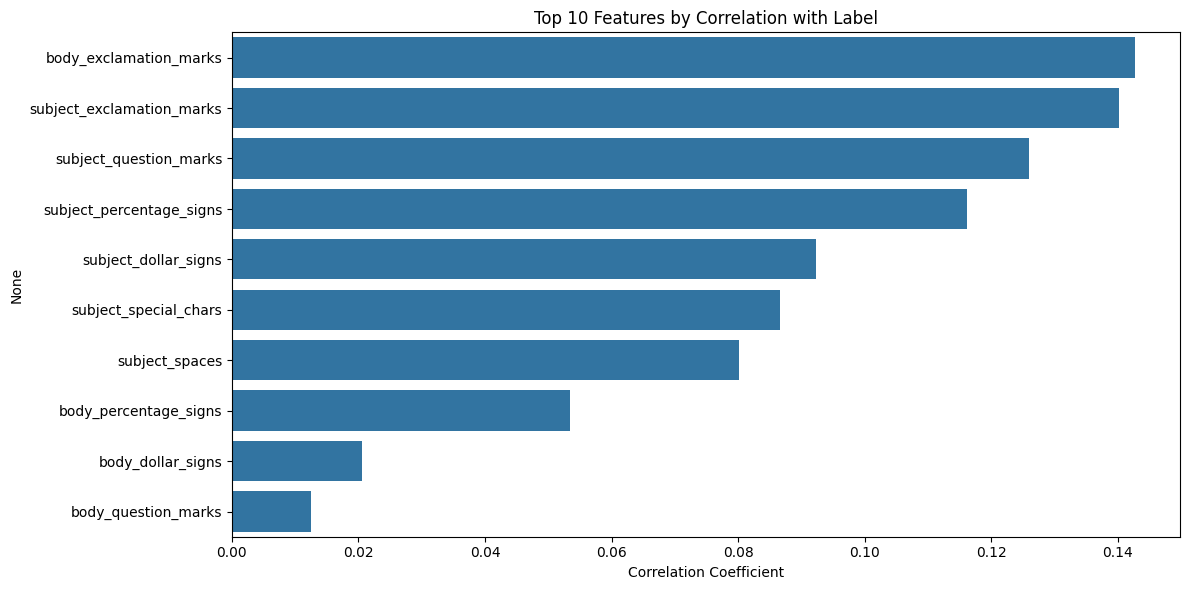

/var/folders/3q/vlkf3y116hb9gjsk53q4gsfh0000gn/T/ipykernel_17333/804497582.py:67: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subject_matches = df_cleaned['subject_cleaned'].str.contains(pattern, case=False, regex=True)
/var/folders/3q/vlkf3y116hb9gjsk53q4gsfh0000gn/T/ipykernel_17333/804497582.py:68: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  body_matches = df_cleaned['body_cleaned'].str.contains(pattern, case=False, regex=True)



Suspicious Pattern Frequencies by Label:
       subject_urgent_words  body_urgent_words  subject_money_terms  \
label                                                                 
0                  0.291305           3.451333             0.240643   
1                  0.994562           4.457642             2.261019   

       body_money_terms  subject_account_terms  body_account_terms  \
label                                                                
0              7.301628               0.221645            5.218162   
1             20.263309               1.130509            8.958214   

       subject_action_words  body_action_words  subject_sensitive_info  \
label                                                                    
0                  2.096131          12.285479                0.056994   
1                  0.393532          26.001717                0.321981   

       body_sensitive_info  
label                       
0                 2.514090  
1       

<Figure size 1200x600 with 0 Axes>

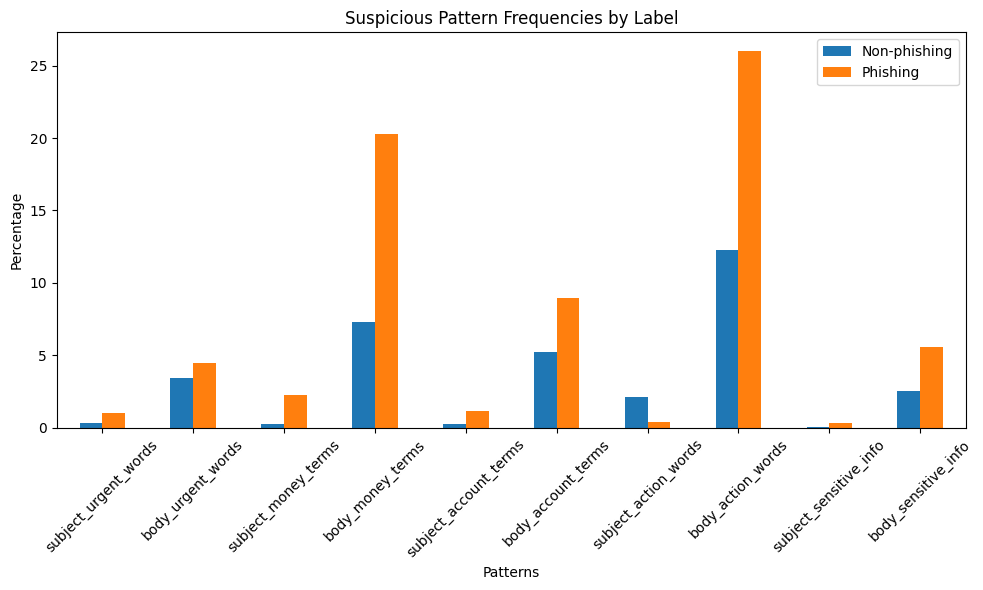

In [62]:
# Combine subject and body features
def analyze_extracted_features(subject_features, body_features, df_cleaned):
    # Add prefixes to distinguish features
    subject_features = subject_features.add_prefix('subject_')
    body_features = body_features.add_prefix('body_')
    
    # Combine features
    all_features = pd.concat([subject_features, body_features], axis=1)
    
    # Add label column for analysis
    all_features['label'] = df_cleaned['label']
    
    # Print basic statistics for each feature
    print("Feature Statistics:")
    print(all_features.describe())
    
    # Analyze feature distributions by label
    plt.figure(figsize=(15, 10))
    
    # Select top features for visualization
    important_features = [
        'subject_special_chars', 'subject_urls', 'subject_email_addresses',
        'body_special_chars', 'body_urls', 'body_email_addresses',
        'body_dollar_signs', 'body_exclamation_marks'
    ]
    
    for idx, feature in enumerate(important_features, 1):
        plt.subplot(2, 4, idx)
        sns.boxplot(x='label', y=feature, data=all_features)
        plt.title(f'{feature} by Label')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation with label
    correlations = all_features.corr()['label'].sort_values(ascending=False)
    print("\nTop 10 Features Correlated with Label:")
    print(correlations[:10])
    
    # Feature importance visualization
    plt.figure(figsize=(12, 6))
    top_features = correlations[1:11]  # Exclude label itself
    sns.barplot(x=top_features.values, y=top_features.index)
    plt.title('Top 10 Features by Correlation with Label')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()
    
    return all_features

# Call the analysis function
all_features = analyze_extracted_features(subject_features, body_features, df_cleaned)

# Additional suspicious pattern analysis
def analyze_suspicious_patterns(df_cleaned):
    suspicious_patterns = {
        'urgent_words': r'\b(urgent|immediate|asap)\b',
        'money_terms': r'\b(money|cash|dollar|payment)\b',
        'account_terms': r'\b(account|password|login|verify)\b',
        'action_words': r'\b(click|link|visit|access)\b',
        'sensitive_info': r'\b(ssn|social security|credit card|bank)\b'
    }
    
    pattern_results = {}
    for name, pattern in suspicious_patterns.items():
        subject_matches = df_cleaned['subject_cleaned'].str.contains(pattern, case=False, regex=True)
        body_matches = df_cleaned['body_cleaned'].str.contains(pattern, case=False, regex=True)
        pattern_results[f'subject_{name}'] = subject_matches
        pattern_results[f'body_{name}'] = body_matches
    
    pattern_df = pd.DataFrame(pattern_results)
    
    # Calculate percentage by label
    print("\nSuspicious Pattern Frequencies by Label:")
    pattern_analysis = pattern_df.groupby(df_cleaned['label']).mean() * 100
    print(pattern_analysis)
    
    # Visualize pattern distributions
    plt.figure(figsize=(12, 6))
    pattern_analysis.T.plot(kind='bar')
    plt.title('Suspicious Pattern Frequencies by Label')
    plt.xlabel('Patterns')
    plt.ylabel('Percentage')
    plt.legend(['Non-phishing', 'Phishing'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analyze suspicious patterns
analyze_suspicious_patterns(df_cleaned)

In [70]:
df.columns

Index(['subject', 'body', 'label', 'subject_length', 'body_length',
       'subject_word_count', 'body_word_count', 'subject_body_ratio',
       'subject_cleaned', 'body_cleaned'],
      dtype='object')

In [73]:
df_cleaned.columns

Index(['subject', 'body', 'label', 'subject_length', 'body_length',
       'subject_word_count', 'body_word_count', 'subject_body_ratio',
       'subject_cleaned', 'body_cleaned'],
      dtype='object')

In [71]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/naveenaganesan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/naveenaganesan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/naveenaganesan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/naveenaganesan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [85]:
# def preprocess_text_for_analysis(text):
#     """
#     Preprocess text for advanced analysis
#     """
#     # Convert to lowercase
#     text = text.lower()
    
#     # Tokenize
#     tokens = word_tokenize(text)
    
#     # Remove stopwords and non-alphabetic tokens
#     stop_words = set(stopwords.words('english'))
#     tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
#     # Lemmatize
#     lemmatizer = WordNetLemmatizer()
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
#     return ' '.join(tokens)

# def analyze_word_frequencies(df, column, n_words=20):
#     """
#     Analyze word frequencies and create word cloud
#     """
#     # Combine all text
#     text = ' '.join(df[column])
    
#     # Create word cloud
#     plt.figure(figsize=(12, 6))
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.imshow(wordcloud)
#     plt.axis('off')
#     plt.title(f'Word Cloud - {column}')
#     plt.show()
    
#     # Get word frequencies
#     words = word_tokenize(text)
#     word_freq = Counter(words).most_common(n_words)
    
#     # Plot word frequencies
#     plt.figure(figsize=(12, 6))
#     pd.DataFrame(word_freq, columns=['Word', 'Frequency']).plot(
#         x='Word', y='Frequency', kind='bar'
#     )
#     plt.title(f'Top {n_words} Words - {column}')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()
    
#     return word_freq

# def perform_topic_modeling(df, column, n_topics=5, n_words=10):
#     """
#     Perform topic modeling using LDA and NMF
#     """
#     # Create TF-IDF matrix
#     tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
#     text_matrix = tfidf.fit_transform(df[column])
#     feature_names = tfidf.get_feature_names_out()
    
#     # LDA Topic Modeling
#     lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
#     lda_output = lda.fit_transform(text_matrix)
    
#     # NMF Topic Modeling
#     nmf = NMF(n_components=n_topics, random_state=42)
#     nmf_output = nmf.fit_transform(text_matrix)
    
#     # Print top words for each topic
#     print(f"\nLDA Topics for {column}:")
#     for topic_idx, topic in enumerate(lda.components_):
#         top_words = [feature_names[i] for i in topic.argsort()[:-n_words-1:-1]]
#         print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    
#     print(f"\nNMF Topics for {column}:")
#     for topic_idx, topic in enumerate(nmf.components_):
#         top_words = [feature_names[i] for i in topic.argsort()[:-n_words-1:-1]]
#         print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    
#     return lda_output, nmf_output, feature_names

# def create_tfidf_features(df, column, max_features=1000):
#     """
#     Create TF-IDF features and analyze important terms
#     """
#     # Create TF-IDF matrix
#     tfidf = TfidfVectorizer(max_features=max_features, stop_words='english')
#     tfidf_matrix = tfidf.fit_transform(df[column])
#     feature_names = tfidf.get_feature_names_out()
    
#     # Convert to DataFrame
#     tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    
#     # Analyze average TF-IDF scores by label
#     tfidf_by_label = []
#     for label in [0, 1]:
#         mask = df['label'] == label
#         avg_tfidf = tfidf_matrix[mask].mean(axis=0).A1
#         top_terms = sorted(zip(feature_names, avg_tfidf), key=lambda x: x[1], reverse=True)[:20]
#         tfidf_by_label.append(top_terms)
    
#     # Plot top terms for each label
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
#     # Non-phishing emails
#     terms, scores = zip(*tfidf_by_label[0])
#     ax1.barh(range(len(terms)), scores)
#     ax1.set_yticks(range(len(terms)))
#     ax1.set_yticklabels(terms)
#     ax1.set_title('Top TF-IDF Terms - Non-phishing')
    
#     # Phishing emails
#     terms, scores = zip(*tfidf_by_label[1])
#     ax2.barh(range(len(terms)), scores)
#     ax2.set_yticks(range(len(terms)))
#     ax2.set_yticklabels(terms)
#     ax2.set_title('Top TF-IDF Terms - Phishing')
    
#     plt.tight_layout()
#     plt.show()
    
#     return tfidf_matrix, feature_names

# # Main analysis
# def main_text_analysis(df):
#     """
#     Perform complete text analysis
#     """
#     print("Starting text analysis...")
    
#     # Preprocess text
#     print("Preprocessing text...")
#     df['processed_subject'] = df['subject_cleaned'].apply(preprocess_text_for_analysis)
#     df['processed_body'] = df['body_cleaned'].apply(preprocess_text_for_analysis)
    
#     # 1. Word Frequency Analysis
#     print("\nAnalyzing word frequencies...")
#     print("\nSubject Analysis:")
#     subject_freq = analyze_word_frequencies(df, 'processed_subject')
#     print("\nBody Analysis:")
#     body_freq = analyze_word_frequencies(df, 'processed_body')
    
#     # 2. Topic Modeling
#     print("\nPerforming topic modeling...")
#     subject_lda, subject_nmf, subject_features = perform_topic_modeling(df, 'processed_subject')
#     body_lda, body_nmf, body_features = perform_topic_modeling(df, 'processed_body')
    
#     # 3. TF-IDF Analysis
#     print("\nCreating TF-IDF features...")
#     subject_tfidf, subject_terms = create_tfidf_features(df, 'processed_subject')
#     body_tfidf, body_terms = create_tfidf_features(df, 'processed_body')
    
#     return {
#         'word_frequencies': {'subject': subject_freq, 'body': body_freq},
#         'topic_modeling': {
#             'subject': {'lda': subject_lda, 'nmf': subject_nmf, 'features': subject_features},
#             'body': {'lda': body_lda, 'nmf': body_nmf, 'features': body_features}
#         },
#         'tfidf': {'subject': subject_tfidf, 'body': body_tfidf}
#     }

# # Run the analysis
# analysis_results = main_text_analysis(df_cleaned)

In [ ]:
# def preprocess_text_for_analysis(text):
#     """
#     Preprocess text for advanced analysis
#     """
#     try:
#         # Ensure text is string
#         text = str(text)
        
#         # Convert to lowercase
#         text = text.lower()
        
#         # Tokenize
#         tokens = word_tokenize(text)
        
#         # Remove stopwords and non-alphabetic tokens
#         stop_words = set(stopwords.words('english'))
#         tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        
#         # Lemmatize
#         lemmatizer = WordNetLemmatizer()
#         tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
#         return ' '.join(tokens)
#     except Exception as e:
#         print(f"Error in preprocessing text: {str(e)}")
#         return text  # Return original text if preprocessing fails

# def create_tfidf_features(texts, max_features=1000):
#     """
#     Create TF-IDF features
#     """
#     try:
#         # Create TF-IDF matrix
#         tfidf = TfidfVectorizer(max_features=max_features, 
#                                stop_words='english',
#                                ngram_range=(1, 2))  # Include bigrams
#         tfidf_matrix = tfidf.fit_transform(texts)
#         return tfidf_matrix, tfidf.get_feature_names_out()
#     except Exception as e:
#         print(f"Error in TF-IDF creation: {str(e)}")
#         return None, None

# def main_text_analysis(df):
#     """
#     Perform complete text analysis with error handling
#     """
#     try:
#         print("Starting text analysis...")
        
#         # Check if required columns exist
#         required_columns = ['subject_cleaned', 'body_cleaned']
#         if not all(col in df.columns for col in required_columns):
#             raise ValueError("Required columns missing from dataframe")
        
#         # Initialize results dictionary
#         results = {
#             'tfidf': {},
#             'preprocessing': {'success': False},
#             'feature_names': {}
#         }
        
#         # Preprocess text
#         print("Preprocessing text...")
#         df['processed_subject'] = df['subject_cleaned'].apply(preprocess_text_for_analysis)
#         df['processed_body'] = df['body_cleaned'].apply(preprocess_text_for_analysis)
#         results['preprocessing']['success'] = True
        
#         # Create TF-IDF features for subject
#         print("Creating TF-IDF features for subject...")
#         subject_tfidf, subject_terms = create_tfidf_features(df['processed_subject'])
#         if subject_tfidf is not None:
#             results['tfidf']['subject'] = subject_tfidf
#             results['feature_names']['subject'] = subject_terms
        
#         # Create TF-IDF features for body
#         print("Creating TF-IDF features for body...")
#         body_tfidf, body_terms = create_tfidf_features(df['processed_body'])
#         if body_tfidf is not None:
#             results['tfidf']['body'] = body_tfidf
#             results['feature_names']['body'] = body_terms
        
#         print("Text analysis completed successfully!")
#         return results
    
#     except Exception as e:
#         print(f"Error in main text analysis: {str(e)}")
#         return None

# # Function to check if analysis was successful
# def verify_analysis_results(results):
#     """
#     Verify if the analysis results are valid
#     """
#     if results is None:
#         print("Analysis failed completely")
#         return False
    
#     success = True
    
#     if not results['preprocessing']['success']:
#         print("Text preprocessing failed")
#         success = False
    
#     if 'subject' not in results['tfidf'] or results['tfidf']['subject'] is None:
#         print("Subject TF-IDF creation failed")
#         success = False
    
#     if 'body' not in results['tfidf'] or results['tfidf']['body'] is None:
#         print("Body TF-IDF creation failed")
#         success = False
    
#     return success

# # Run the analysis with verification
# try:
#     print("Starting analysis pipeline...")
    
#     # Ensure df_cleaned exists and has required columns
#     if 'df_cleaned' not in globals():
#         raise NameError("df_cleaned not found. Please run the data cleaning steps first.")
    
#     # Run the analysis
#     analysis_results = main_text_analysis(df_cleaned)
    
#     # Verify results
#     if verify_analysis_results(analysis_results):
#         print("Analysis completed successfully!")
        
#         # Print some basic statistics
#         print("\nTF-IDF Matrix Shapes:")
#         print(f"Subject: {analysis_results['tfidf']['subject'].shape}")
#         print(f"Body: {analysis_results['tfidf']['body'].shape}")
        
#         # Print sample feature names
#         print("\nSample Subject Features:")
#         print(analysis_results['feature_names']['subject'][:10])
#         print("\nSample Body Features:")
#         print(analysis_results['feature_names']['body'][:10])
#     else:
#         print("Analysis completed with some errors. Please check the messages above.")
    
# except Exception as e:
#     print(f"Error in analysis pipeline: {str(e)}")
#     print("Please ensure that:")
#     print("1. The data cleaning steps have been run")
#     print("2. The cleaned dataframe (df_cleaned) exists")
#     print("3. The required columns (subject_cleaned, body_cleaned) are present")



Classification models

In [78]:
# # Import required libraries
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping
# import warnings
# warnings.filterwarnings('ignore')

# def prepare_features(df, subject_tfidf, body_tfidf):
#     """
#     Prepare features for modeling
#     """
#     # Combine TF-IDF features
#     tfidf_features = np.hstack([subject_tfidf.toarray(), body_tfidf.toarray()])
    
#     # Create other features DataFrame
#     other_features = pd.DataFrame({
#         # Length-based features
#         'subject_length': df['subject_cleaned'].str.len(),
#         'body_length': df['body_cleaned'].str.len(),
#         'subject_word_count': df['subject_cleaned'].str.split().str.len(),
#         'body_word_count': df['body_cleaned'].str.split().str.len(),
        
#         # Special character features
#         'subject_special_chars': df['subject_cleaned'].str.count(r'[^a-zA-Z0-9\s]'),
#         'body_special_chars': df['body_cleaned'].str.count(r'[^a-zA-Z0-9\s]'),
        
#         # URL and email features
#         'subject_urls': df['subject_cleaned'].str.count(r'http[s]?://'),
#         'body_urls': df['body_cleaned'].str.count(r'http[s]?://'),
#         'subject_emails': df['subject_cleaned'].str.count(r'[\w\.-]+@[\w\.-]+'),
#         'body_emails': df['body_cleaned'].str.count(r'[\w\.-]+@[\w\.-]+'),
        
#         # Punctuation features
#         'subject_exclamation': df['subject_cleaned'].str.count('!'),
#         'body_exclamation': df['body_cleaned'].str.count('!'),
#         'subject_question': df['subject_cleaned'].str.count('?'),
#         'body_question': df['body_cleaned'].str.count('?'),
        
#         # Capitalization features
#         'subject_uppercase_ratio': df['subject_cleaned'].str.count(r'[A-Z]') / 
#                                  df['subject_cleaned'].str.len().clip(lower=1),
#         'body_uppercase_ratio': df['body_cleaned'].str.count(r'[A-Z]') / 
#                                df['body_cleaned'].str.len().clip(lower=1)
#     })
    
#     # Combine all features
#     X = np.hstack([tfidf_features, other_features])
#     y = df['label']
    
#     return X, y

# def train_evaluate_models(X, y):
#     """
#     Train and evaluate multiple models
#     """
#     # Split the data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )
    
#     # Scale features
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Define models
#     models = {
#         'Logistic Regression': LogisticRegression(random_state=42),
#         'Random Forest': RandomForestClassifier(random_state=42),
#         'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#         'SVM': SVC(probability=True, random_state=42)
#     }
    
#     # Train and evaluate each model
#     results = {}
#     plt.figure(figsize=(12, 8))
    
#     for name, model in models.items():
#         print(f"\nTraining {name}...")
        
#         # Train model
#         model.fit(X_train_scaled, y_train)
        
#         # Make predictions
#         y_pred = model.predict(X_test_scaled)
#         y_prob = model.predict_proba(X_test_scaled)[:, 1]
        
#         # Calculate metrics
#         report = classification_report(y_test, y_pred)
#         conf_matrix = confusion_matrix(y_test, y_pred)
        
#         # ROC curve
#         fpr, tpr, _ = roc_curve(y_test, y_prob)
#         roc_auc = auc(fpr, tpr)
        
#         plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        
#         # Store results
#         results[name] = {
#             'model': model,
#             'report': report,
#             'conf_matrix': conf_matrix,
#             'auc': roc_auc
#         }
        
#         # Print results
#         print(f"\nClassification Report for {name}:")
#         print(report)
        
#         # Plot confusion matrix
#         plt.figure(figsize=(6, 6))
#         sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
#         plt.title(f'Confusion Matrix - {name}')
#         plt.ylabel('True Label')
#         plt.xlabel('Predicted Label')
#         plt.show()
    
#     # Plot ROC curves
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curves')
#     plt.legend(loc='lower right')
#     plt.show()
    
#     return results

# def build_deep_learning_model(X, y):
#     """
#     Build and train a deep learning model
#     """
#     # Split data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )
    
#     # Scale features
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Build model
#     model = Sequential([
#         Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
#         BatchNormalization(),
#         Dropout(0.3),
        
#         Dense(128, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.2),
        
#         Dense(64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.1),
        
#         Dense(1, activation='sigmoid')
#     ])
    
#     # Compile model
#     model.compile(
#         optimizer='adam',
#         loss='binary_crossentropy',
#         metrics=['accuracy']
#     )
    
#     # Train model
#     history = model.fit(
#         X_train_scaled, y_train,
#         validation_split=0.2,
#         epochs=50,
#         batch_size=32,
#         callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
#         verbose=1
#     )
    
#     # Evaluate model
#     y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    
#     # Print results
#     print("\nDeep Learning Model Results:")
#     print(classification_report(y_test, y_pred))
    
#     # Plot training history
#     plt.figure(figsize=(12, 4))
    
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Model Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
    
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Model Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
    
#     plt.tight_layout()
#     plt.show()
    
#     return model, history

# # Main execution
# def main():
#     # Prepare features
#     X, y = prepare_features(df_cleaned, analysis_results['tfidf']['subject'], 
#                           analysis_results['tfidf']['body'])
    
#     # Train and evaluate traditional models
#     print("Training traditional models...")
#     model_results = train_evaluate_models(X, y)
    
#     # Train deep learning model
#     print("\nTraining deep learning model...")
#     dl_model, dl_history = build_deep_learning_model(X, y)
    
#     return model_results, dl_model, dl_history

# # Run the modeling pipeline
# model_results, dl_model, dl_history = main()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping
# import re
# import warnings
# warnings.filterwarnings('ignore')

# def prepare_features(df, subject_tfidf, body_tfidf):
#     """
#     Prepare features for modeling with error handling
#     """
#     try:
#         print("Preparing features...")
        
#         # Convert TF-IDF matrices to arrays and combine
#         tfidf_features = np.hstack([
#             subject_tfidf.toarray() if hasattr(subject_tfidf, 'toarray') else subject_tfidf,
#             body_tfidf.toarray() if hasattr(body_tfidf, 'toarray') else body_tfidf
#         ])

#         print("TFIDF Features: ", tfidf_features)
        
#         # Safe string operations
#         def safe_len(x):
#             return len(str(x))
        
#         def safe_word_count(x):
#             return len(str(x).split())
        
#         def safe_pattern_count(text, pattern):
#             try:
#                 return len(re.findall(pattern, str(text)))
#             except:
#                 return 0
        
#         # Create other features DataFrame
#         other_features = pd.DataFrame({
#             # Length-based features
#             'subject_length': df['subject_cleaned'].apply(safe_len),
#             'body_length': df['body_cleaned'].apply(safe_len),
#             'subject_word_count': df['subject_cleaned'].apply(safe_word_count),
#             'body_word_count': df['body_cleaned'].apply(safe_word_count),
            
#             # Special character features
#             'subject_special_chars': df['subject_cleaned'].apply(lambda x: safe_pattern_count(x, r'[^a-zA-Z0-9\s]')),
#             'body_special_chars': df['body_cleaned'].apply(lambda x: safe_pattern_count(x, r'[^a-zA-Z0-9\s]')),
            
#             # URL and email features
#             'subject_urls': df['subject_cleaned'].apply(lambda x: safe_pattern_count(x, r'http[s]?://[^\s]+')),
#             'body_urls': df['body_cleaned'].apply(lambda x: safe_pattern_count(x, r'http[s]?://[^\s]+')),
#             'subject_emails': df['subject_cleaned'].apply(lambda x: safe_pattern_count(x, r'[^\s]+@[^\s]+')),
#             'body_emails': df['body_cleaned'].apply(lambda x: safe_pattern_count(x, r'[^\s]+@[^\s]+')),
            
#             # Punctuation features
#             'subject_exclamation': df['subject_cleaned'].str.count('!').fillna(0),
#             'body_exclamation': df['body_cleaned'].str.count('!').fillna(0),
#             'subject_question': df['subject_cleaned'].str.count('?').fillna(0),
#             'body_question': df['body_cleaned'].str.count('?').fillna(0)
#         })
        
#         print("Adding ratio features...")
#         # Add ratio features safely
#         other_features['subject_uppercase_ratio'] = df['subject_cleaned'].apply(
#             lambda x: len(re.findall(r'[A-Z]', str(x))) / safe_len(x) if safe_len(x) > 0 else 0
#         )
#         other_features['body_uppercase_ratio'] = df['body_cleaned'].apply(
#             lambda x: len(re.findall(r'[A-Z]', str(x))) / safe_len(x) if safe_len(x) > 0 else 0
#         )
        
#         # Fill any NaN values that might have been created
#         other_features = other_features.fillna(0)
        
#         # Combine all features
#         print(f"TF-IDF features shape: {tfidf_features.shape}")
#         print(f"Other features shape: {other_features.shape}")
        
#         X = np.hstack([tfidf_features, other_features])
#         y = df['label']
        
#         print(f"Final feature matrix shape: {X.shape}")
#         return X, y
        
#     except Exception as e:
#         print(f"Error in feature preparation: {str(e)}")
#         raise

# def train_evaluate_models(X, y):
#     """
#     Train and evaluate multiple models
#     """
#     try:
#         # Split the data
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size=0.2, random_state=42, stratify=y
#         )
        
#         # Scale features
#         scaler = StandardScaler()
#         X_train_scaled = scaler.fit_transform(X_train)
#         X_test_scaled = scaler.transform(X_test)
        
#         # Define models
#         models = {
#             'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
#             'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
#             'Gradient Boosting': GradientBoostingClassifier(random_state=42)
#         }
        
#         # Train and evaluate each model
#         results = {}
        
#         for name, model in models.items():
#             print(f"\nTraining {name}...")
            
#             # Train model
#             model.fit(X_train_scaled, y_train)
            
#             # Make predictions
#             y_pred = model.predict(X_test_scaled)
#             y_prob = model.predict_proba(X_test_scaled)[:, 1]
            
#             # Calculate metrics
#             results[name] = {
#                 'model': model,
#                 'predictions': y_pred,
#                 'probabilities': y_prob,
#                 'report': classification_report(y_test, y_pred),
#                 'conf_matrix': confusion_matrix(y_test, y_pred)
#             }
            
#             # Print results
#             print(f"\nClassification Report for {name}:")
#             print(results[name]['report'])
            
#             # Plot confusion matrix
#             plt.figure(figsize=(6, 6))
#             sns.heatmap(results[name]['conf_matrix'], 
#                        annot=True, fmt='d', cmap='Blues',
#                        xticklabels=['Non-Phishing', 'Phishing'],
#                        yticklabels=['Non-Phishing', 'Phishing'])
#             plt.title(f'Confusion Matrix - {name}')
#             plt.ylabel('True Label')
#             plt.xlabel('Predicted Label')
#             plt.show()
        
#         return results
        
#     except Exception as e:
#         print(f"Error in model training: {str(e)}")
#         raise

# def main():
#     try:
#         # Prepare features
#         X, y = prepare_features(df_cleaned, analysis_results['tfidf']['subject'], 
#                               analysis_results['tfidf']['body'])
        
#         # Train and evaluate traditional models
#         print("Training traditional models...")
#         model_results = train_evaluate_models(X, y)
        
#         # Return results
#         return model_results
    
#     except Exception as e:
#         print(f"Error in main execution: {str(e)}")
#         return None

# # Run the modeling pipeline with error handling
# try:
#     print("Starting modeling pipeline...")
#     model_results = main()
    
#     if model_results is not None:
#         print("\nModeling completed successfully!")
        
#         # Print best model results
#         best_model = max(model_results.items(), 
#                         key=lambda x: float(re.search(r'accuracy\s*:\s*(0\.\d+)',
#                                                     x[1]['report']).group(1)))
#         print(f"\nBest performing model: {best_model[0]}")
#     else:
#         print("Modeling failed. Please check the errors above.")
        
# except Exception as e:
#     print(f"Pipeline execution failed: {str(e)}")

In [86]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def build_deep_learning_model(all_features, test_size=0.2, random_state=42):
    # Prepare the data
    X = all_features.drop('label', axis=1)
    y = all_features['label']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Build the model
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # Train the model
    history = model.fit(
        X_train_scaled, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
    print(f"\nTest accuracy: {test_accuracy:.4f}")
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    return {
        'model': model,
        'history': history,
        'scaler': scaler,
        'predictions': y_pred_binary,
        'test_accuracy': test_accuracy,
        'test_data': (X_test, y_test)
    }

# Use the model
results = build_deep_learning_model(all_features)

Epoch 1/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 2s 532us/step - accuracy: 0.6719 - loss: 0.6063 - val_accuracy: 0.7798 - val_loss: 0.4709
Epoch 2/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.7771 - loss: 0.4854 - val_accuracy: 0.7898 - val_loss: 0.4525
Epoch 3/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.7953 - loss: 0.4612 - val_accuracy: 0.7974 - val_loss: 0.4412
Epoch 4/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.7994 - loss: 0.4482 - val_accuracy: 0.7978 - val_loss: 0.4340
Epoch 5/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8013 - loss: 0.4425 - val_accuracy: 0.8031 - val_loss: 0.4233
Epoch 6/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.7999 - loss: 0.4392 - val_accuracy: 0.8045 - val_loss: 0.4190
Epoch 7/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.8107 - loss: 0.4320 - val_accuracy: 0.8081 - val_loss: 0.4122
Epoch 8/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8091 - loss: 0.4245 - 

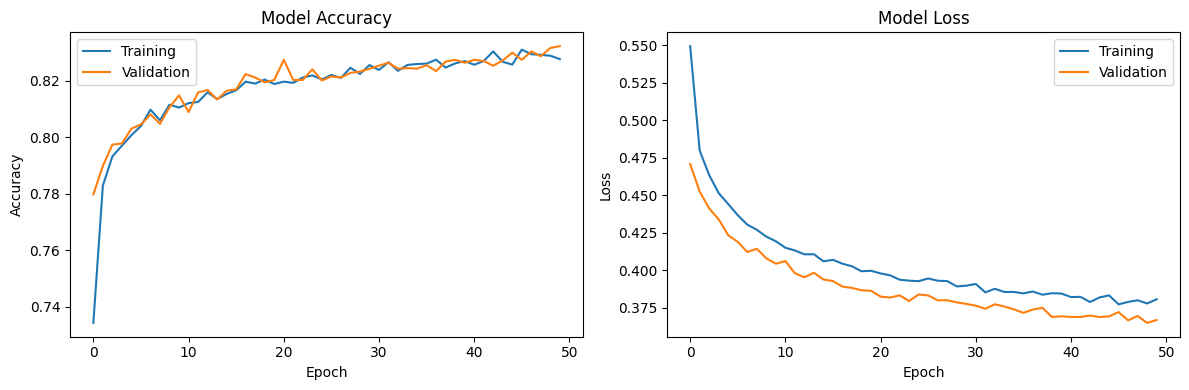


Logistic Regression Results:
Accuracy: 0.7417

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3185
           1       0.78      0.63      0.69      2769

    accuracy                           0.74      5954
   macro avg       0.75      0.73      0.73      5954
weighted avg       0.75      0.74      0.74      5954


Random Forest Results:
Accuracy: 0.8562

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3185
           1       0.85      0.84      0.84      2769

    accuracy                           0.86      5954
   macro avg       0.86      0.86      0.86      5954
weighted avg       0.86      0.86      0.86      5954


SVM Results:
Accuracy: 0.7870

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      3185
           1       0.83      0.68      0.75   

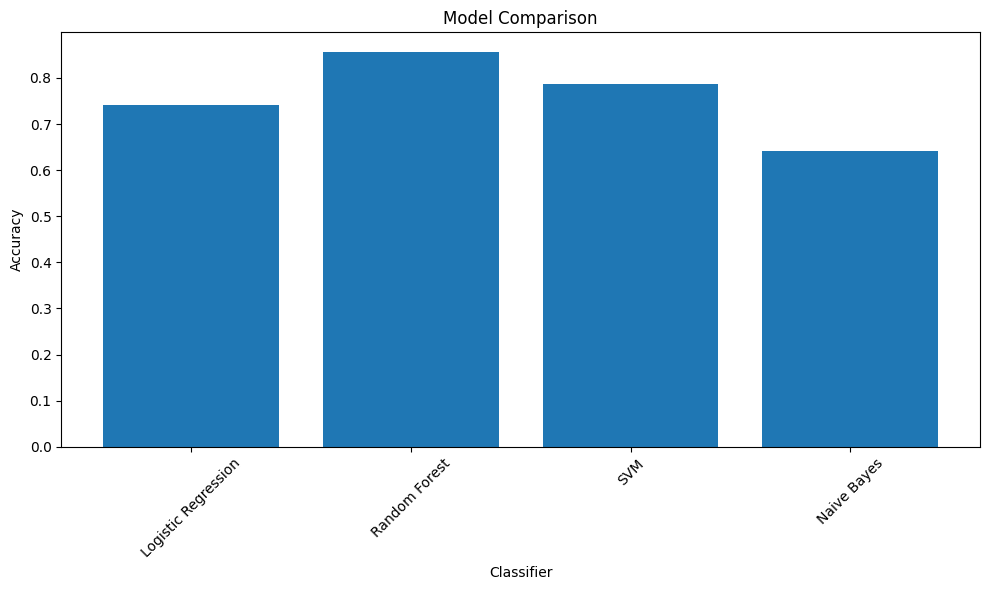

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Plot deep learning history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def train_multiple_classifiers(X, y):
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'Naive Bayes': GaussianNB()
    }
    
    results = {}
    
    for name, clf in classifiers.items():
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"\n{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values())
    plt.title('Model Comparison')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return classifiers, results

# Run evaluation
X = all_features.drop('label', axis=1)
y = all_features['label']

# Plot deep learning results
plot_training_history(results['history'])

# Train and evaluate other classifiers
classifiers, accuracy_results = train_multiple_classifiers(X, y)


Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.7417
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3185
           1       0.78      0.63      0.69      2769

    accuracy                           0.74      5954
   macro avg       0.75      0.73      0.73      5954
weighted avg       0.75      0.74      0.74      5954



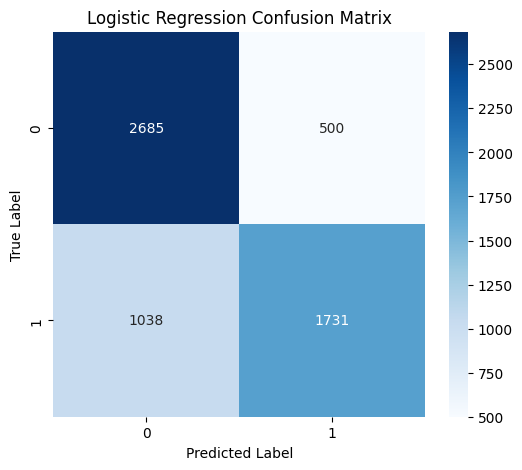


Training Random Forest...
Random Forest Results:
Accuracy: 0.8562
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3185
           1       0.85      0.84      0.84      2769

    accuracy                           0.86      5954
   macro avg       0.86      0.86      0.86      5954
weighted avg       0.86      0.86      0.86      5954



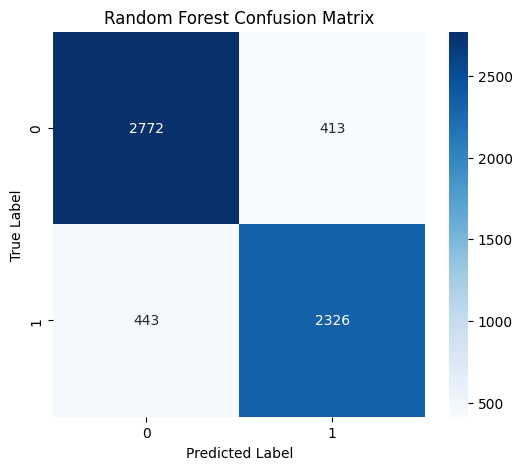


Training SVM...
SVM Results:
Accuracy: 0.7870
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      3185
           1       0.83      0.68      0.75      2769

    accuracy                           0.79      5954
   macro avg       0.80      0.78      0.78      5954
weighted avg       0.79      0.79      0.78      5954



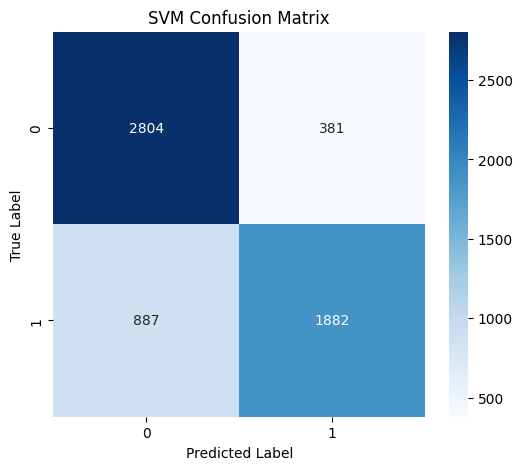


Training Naive Bayes...
Naive Bayes Results:
Accuracy: 0.6411
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      3185
           1       0.86      0.27      0.42      2769

    accuracy                           0.64      5954
   macro avg       0.73      0.62      0.58      5954
weighted avg       0.72      0.64      0.59      5954



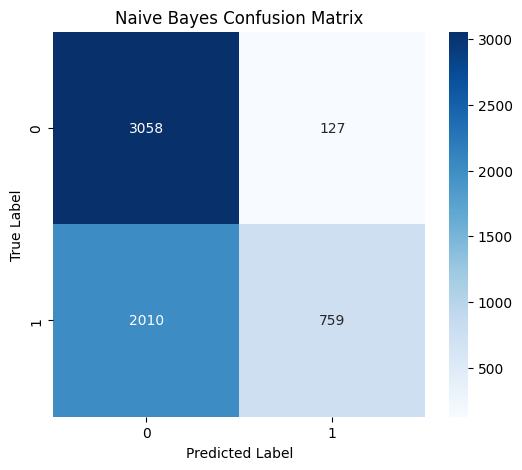


Training Deep Learning...
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
Deep Learning Results:
Accuracy: 0.8196
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      3185
           1       0.83      0.76      0.80      2769

    accuracy                           0.82      5954
   macro avg       0.82      0.82      0.82      5954
weighted avg       0.82      0.82      0.82      5954



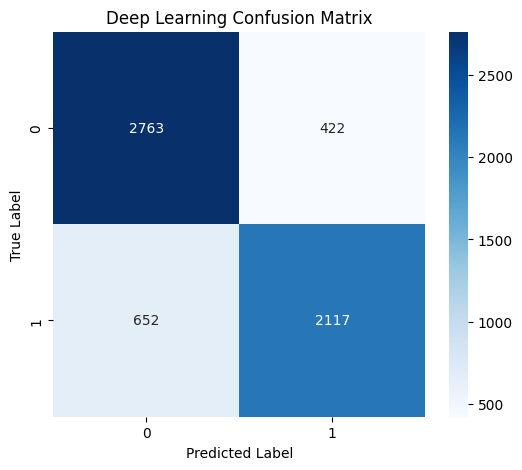

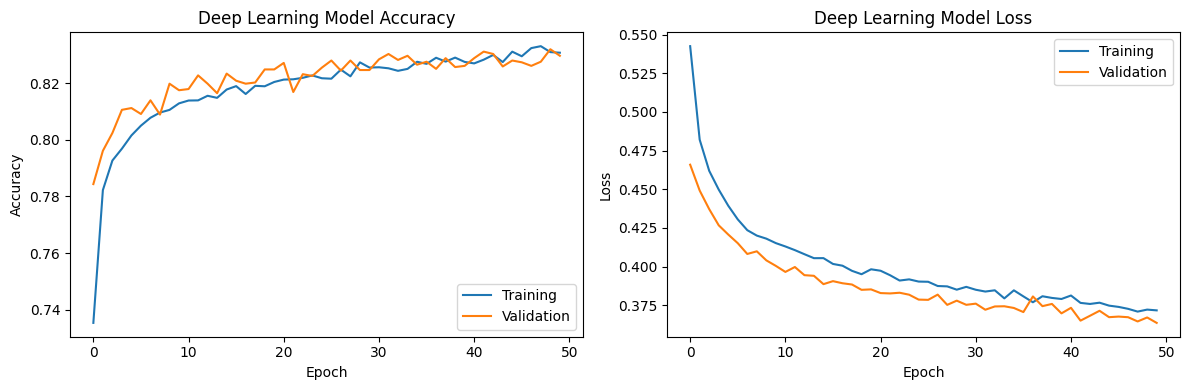

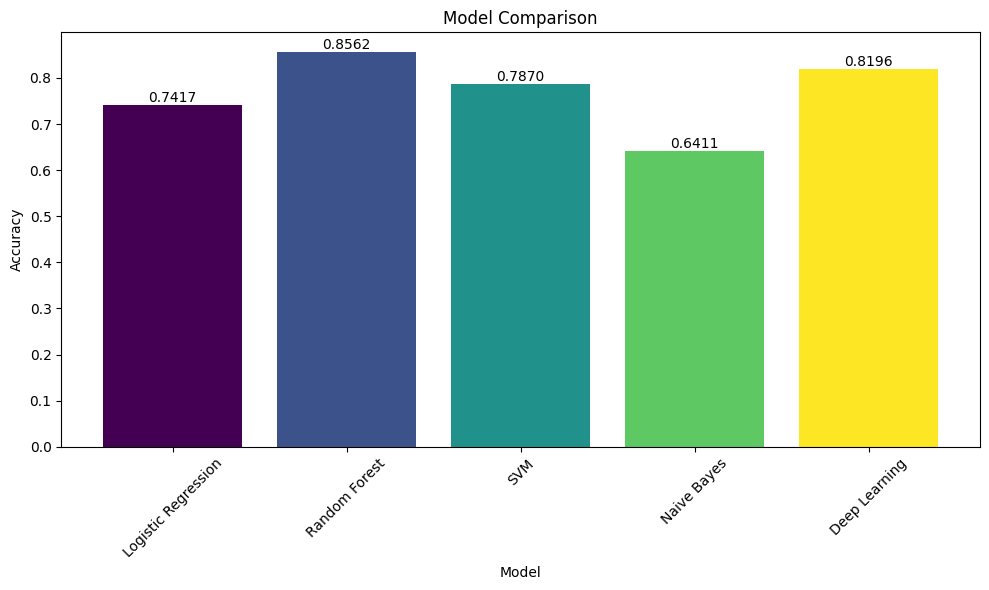

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns

def build_and_train_models(X, y, test_size=0.2, random_state=42):
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=random_state),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=random_state),
        'SVM': SVC(kernel='rbf', random_state=random_state),
        'Naive Bayes': GaussianNB(),
        'Deep Learning': build_deep_learning_model(X_train.shape[1])
    }
    
    results = {}
    histories = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        if name == 'Deep Learning':
            history = model.fit(
                X_train_scaled, y_train,
                epochs=50,
                batch_size=32,
                validation_split=0.2,
                verbose=0
            )
            histories[name] = history
            y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
        else:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        
        # Calculate accuracy and store results
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {
            'accuracy': accuracy,
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred)
        }
        
        print(f"{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(results[name]['classification_report'])
        
        # Plot confusion matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
    
    # Plot deep learning training history
    if 'Deep Learning' in histories:
        plot_dl_history(histories['Deep Learning'])
    
    # Compare all models
    plot_model_comparison(results)
    
    return models, results, histories

def build_deep_learning_model(input_shape):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def plot_dl_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Deep Learning Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Deep Learning Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_model_comparison(results):
    accuracies = {name: res['accuracy'] for name, res in results.items()}
    
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(accuracies)))
    bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)
    
    plt.title('Model Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    
    # Add accuracy values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Run all models
X = all_features.drop('label', axis=1)
y = all_features['label']
models, results, histories = build_and_train_models(X, y)